# Shap explainers and gradient-boosting trees

In [24]:
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostRegressor
import shap
import numpy as np

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules

# Numerical Example

In [29]:
df = pd.read_csv("house_prices/train.csv")
df1 = numerical_df = df.select_dtypes(include=['number'])

In [32]:
df1.shape

(1460, 38)

In [33]:
X = df1[df1.columns[:-1]]
y = df1.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1,
                                   depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set=(X_test,y_test),
                   plot=True)

# Make predictions
y_pred = catboost_model.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Shap analysis

In [36]:
%%time
# Explain predictions with SHAP
explainer = shap.Explainer(catboost_model, X_train)
shap_values = explainer(X_test)

CPU times: user 2.49 s, sys: 32 ms, total: 2.52 s
Wall time: 2.52 s


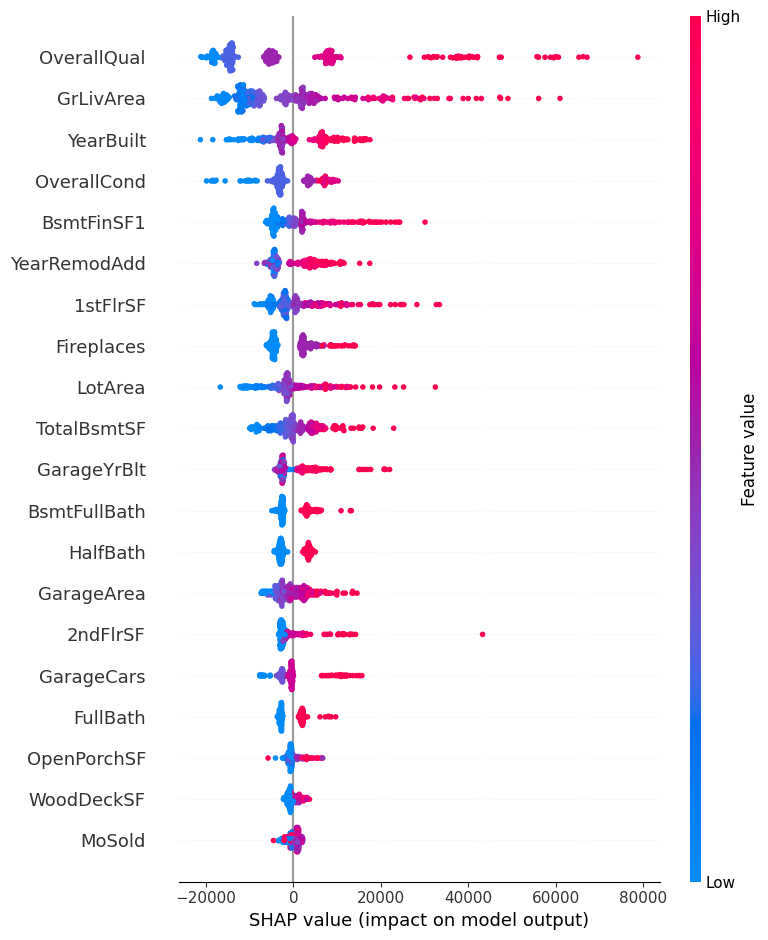

In [39]:
# Summary plot
shap.summary_plot(shap_values, X_test, )

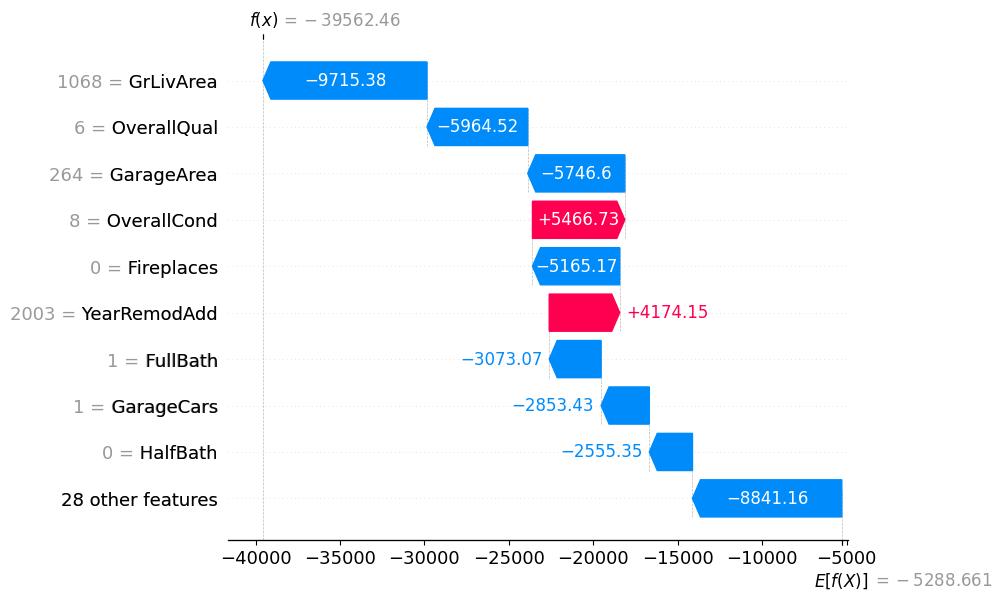

In [18]:
# Waterfall plot for a single observation
shap.plots.waterfall(shap_values[0])

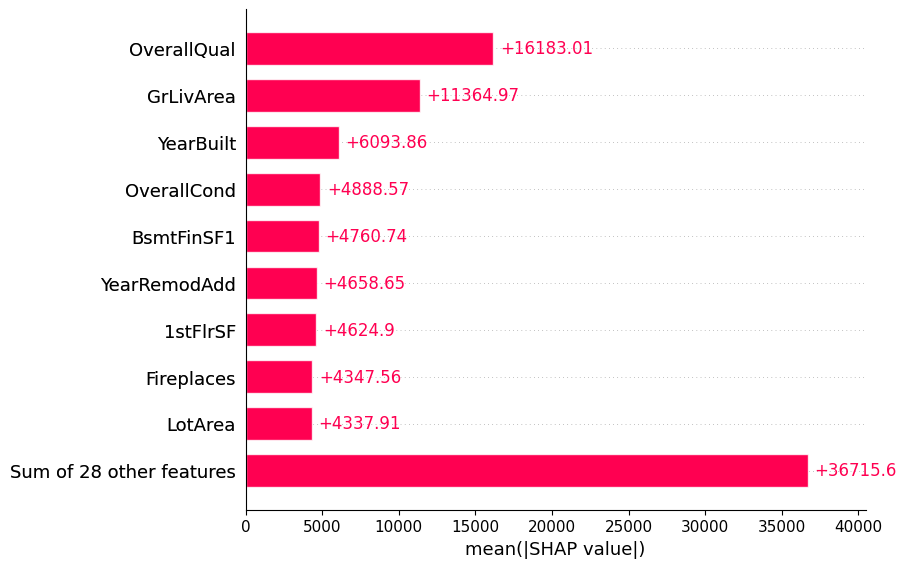

In [40]:
shap.plots.bar(shap_values)

More plots available: https://shap.readthedocs.io/en/latest/generated/shap.plots.bar.html

## Your turn

First, plot the correlation of the outputs with the actual home sale prices.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


array([[1.        , 0.95131956],
       [0.95131956, 1.        ]])

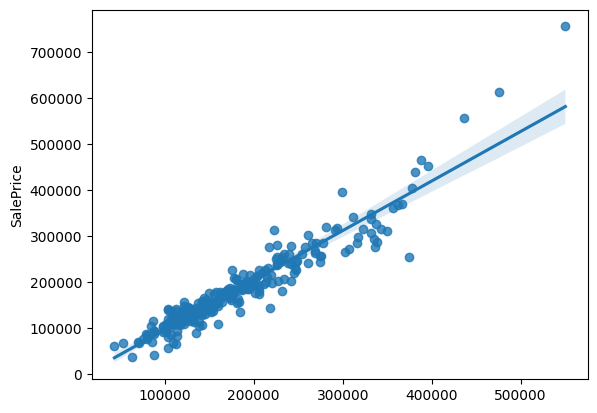

In [45]:
import seaborn as sns

sns.regplot(x = y_pred, y = y_test)

np.corrcoef(y_pred, y_test)

## Next, add in the categorical variables then train a new CatBoost model. Run this through SHAP
What do you observe? What are the top variables now?

In [47]:
df = pd.read_csv("house_prices/train.csv")
categorical_df = df.select_dtypes(include=['object'])
numerical_df = df.select_dtypes(include=['number'])

categorical_features = list(categorical_df.columns)

categorical_df.fillna("NA", inplace = True)

df = pd.concat([categorical_df, numerical_df], axis = 1)
X = df[df.columns[:-1]]
y = df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1,
                                   depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set=(X_test,y_test),
                   plot=True, 
                  cat_features = categorical_features)

# Make predictions
y_pred = catboost_model.predict(X_test)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:
# Explain predictions with SHAP
explainer = shap.TreeExplainer(catboost_model, feature_perturbation="tree_path_dependent")
shap_values = explainer(X_test)

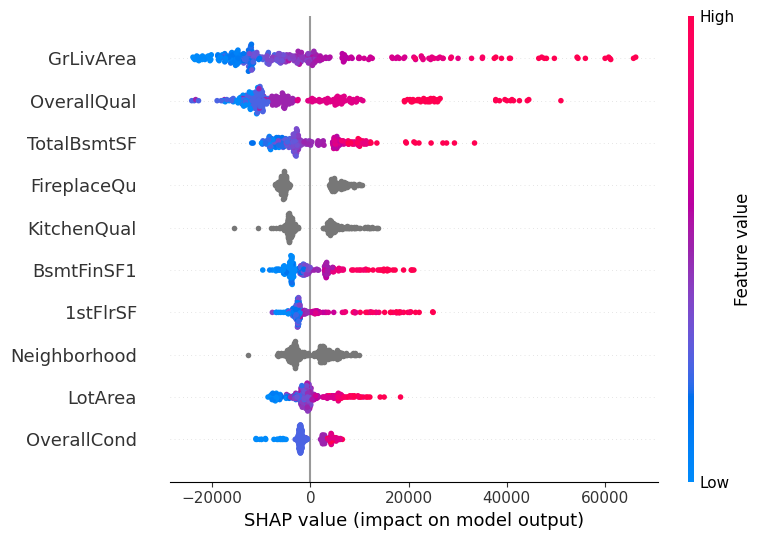

In [51]:
# Summary plot
shap.summary_plot(shap_values, X_test, max_display=10)


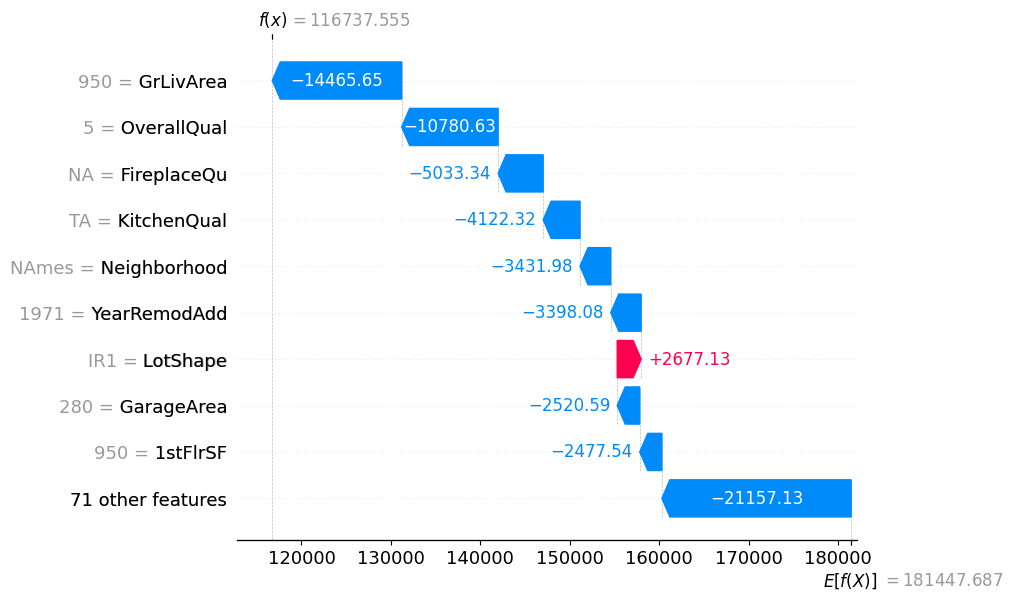

In [58]:
# Waterfall plot for a single observation
shap.plots.waterfall(shap_values[42])


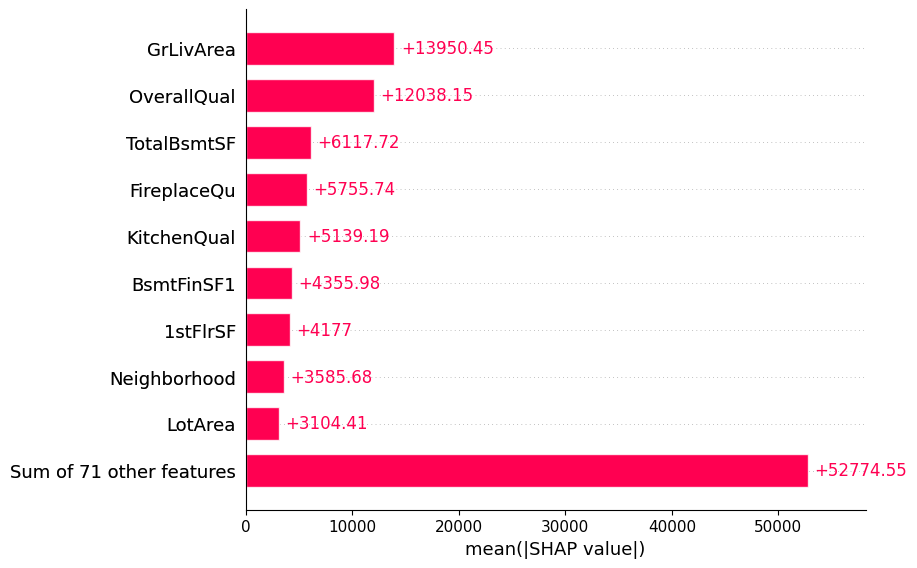

In [60]:
shap.plots.bar(shap_values)